# HW05: Classification (due 2nd November)

**As part of NEXT WEEK'S homework (HW06) you will have to provide feedback to two of your classmates' essays on Eduflow.** On Eduflow, you will be automatically assigned to the two essays you have to provide feedback to on Friday, in case you want to start ahead.

In this homework, we focus again on a prediction task (as we did in week 3). Before diving into the coding part of the homework, I would like you to reflect on the following problem and how you would approach it.

*Suppose you are a policy advisor to a developing country government that would like to design a social security program to aid individuals with wages lower than \$1000 per month. However, data collection in this country is very hard due to the lack of technology infrastructures, incentives to misreport income, and geographical barriers. Therefore, you have access to some demographic and employment data at the individual level from all the municipalities in addition to geographical and municipality level features (here, you can be creative about which variables you have access to). However, you have access to income data only for a random set of municipalities.*

*How would you decide how to allocate the transfer using the methods you learned for this course? Be very specific on the method and the main variables you would use.*

**There is no right or wrong answer here. This is just a conceptual exercise to make you think about the methods we are learning about in real-life problems.** You don't need to write a lot about this; 100 words or even a scheme about your solution to this task would be enough.


**COMMENTS**
In the end, we want to allocate the transfer in a way that we think has most beneficial effects to society. Suppose the goal is to reduce inequality, then the question we might want to ask is what is the effect of the transfer on inequality. To answer this question, we could set up some experiments to estimate the effect of transfers on inequality. There are multiple options: firstly we could do a randomized experiment, where we randomly select municipalities where we implement this policy. If we have enough municiapliities, random assignment would already be enough to estimate the causal effect. However, we could alos use a difference-in-difference design to estimate the causal effect. The outcome variable for this would be income inequality (which we can measure from the income data), whereas our treatment variable would be the designed policy and if a municipality is exposed to it. For the identifcation to make sense, the parallel trends assumption should hold. If that is not true, we could resort to a synthetic control design, where we use multiple other municipalities to create an artificial control group for which the parallel trends assumption holds. 

To find the optimal policy, we might need to multiple experiments where we change the parameters of the policy. (or we can use previous implemented policies as natural experiments to get some ideas on what might work)


## Coding Exercise

Another area of research that is increasingly employing machine learning is that of medical research (a great example of it is [Mullainathan and Obermeyer, 2021](https://www.nber.org/papers/w26168)). The correct prediction of who may encounter a critical clinical condition is fundamental for the allocation of treatments. Indeed, both treatment availability and doctors' time are not infinite. Therefore, correctly predicting who may be more likely to experience a heart attack or develop cancer is extremely important to help these people and not waste precious resources at the same time.

In the following, the main goal will be to predict the probability of a heart attack using some health indicators described below. **Note that these are fake data created following the pattern from a dataset with real health indicators.**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/HW05.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Attribute Information**

- age
- sex: 0 = female; 1 = male
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: 0= less chance of heart attack 1= more chance of heart attack

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Visualize the data

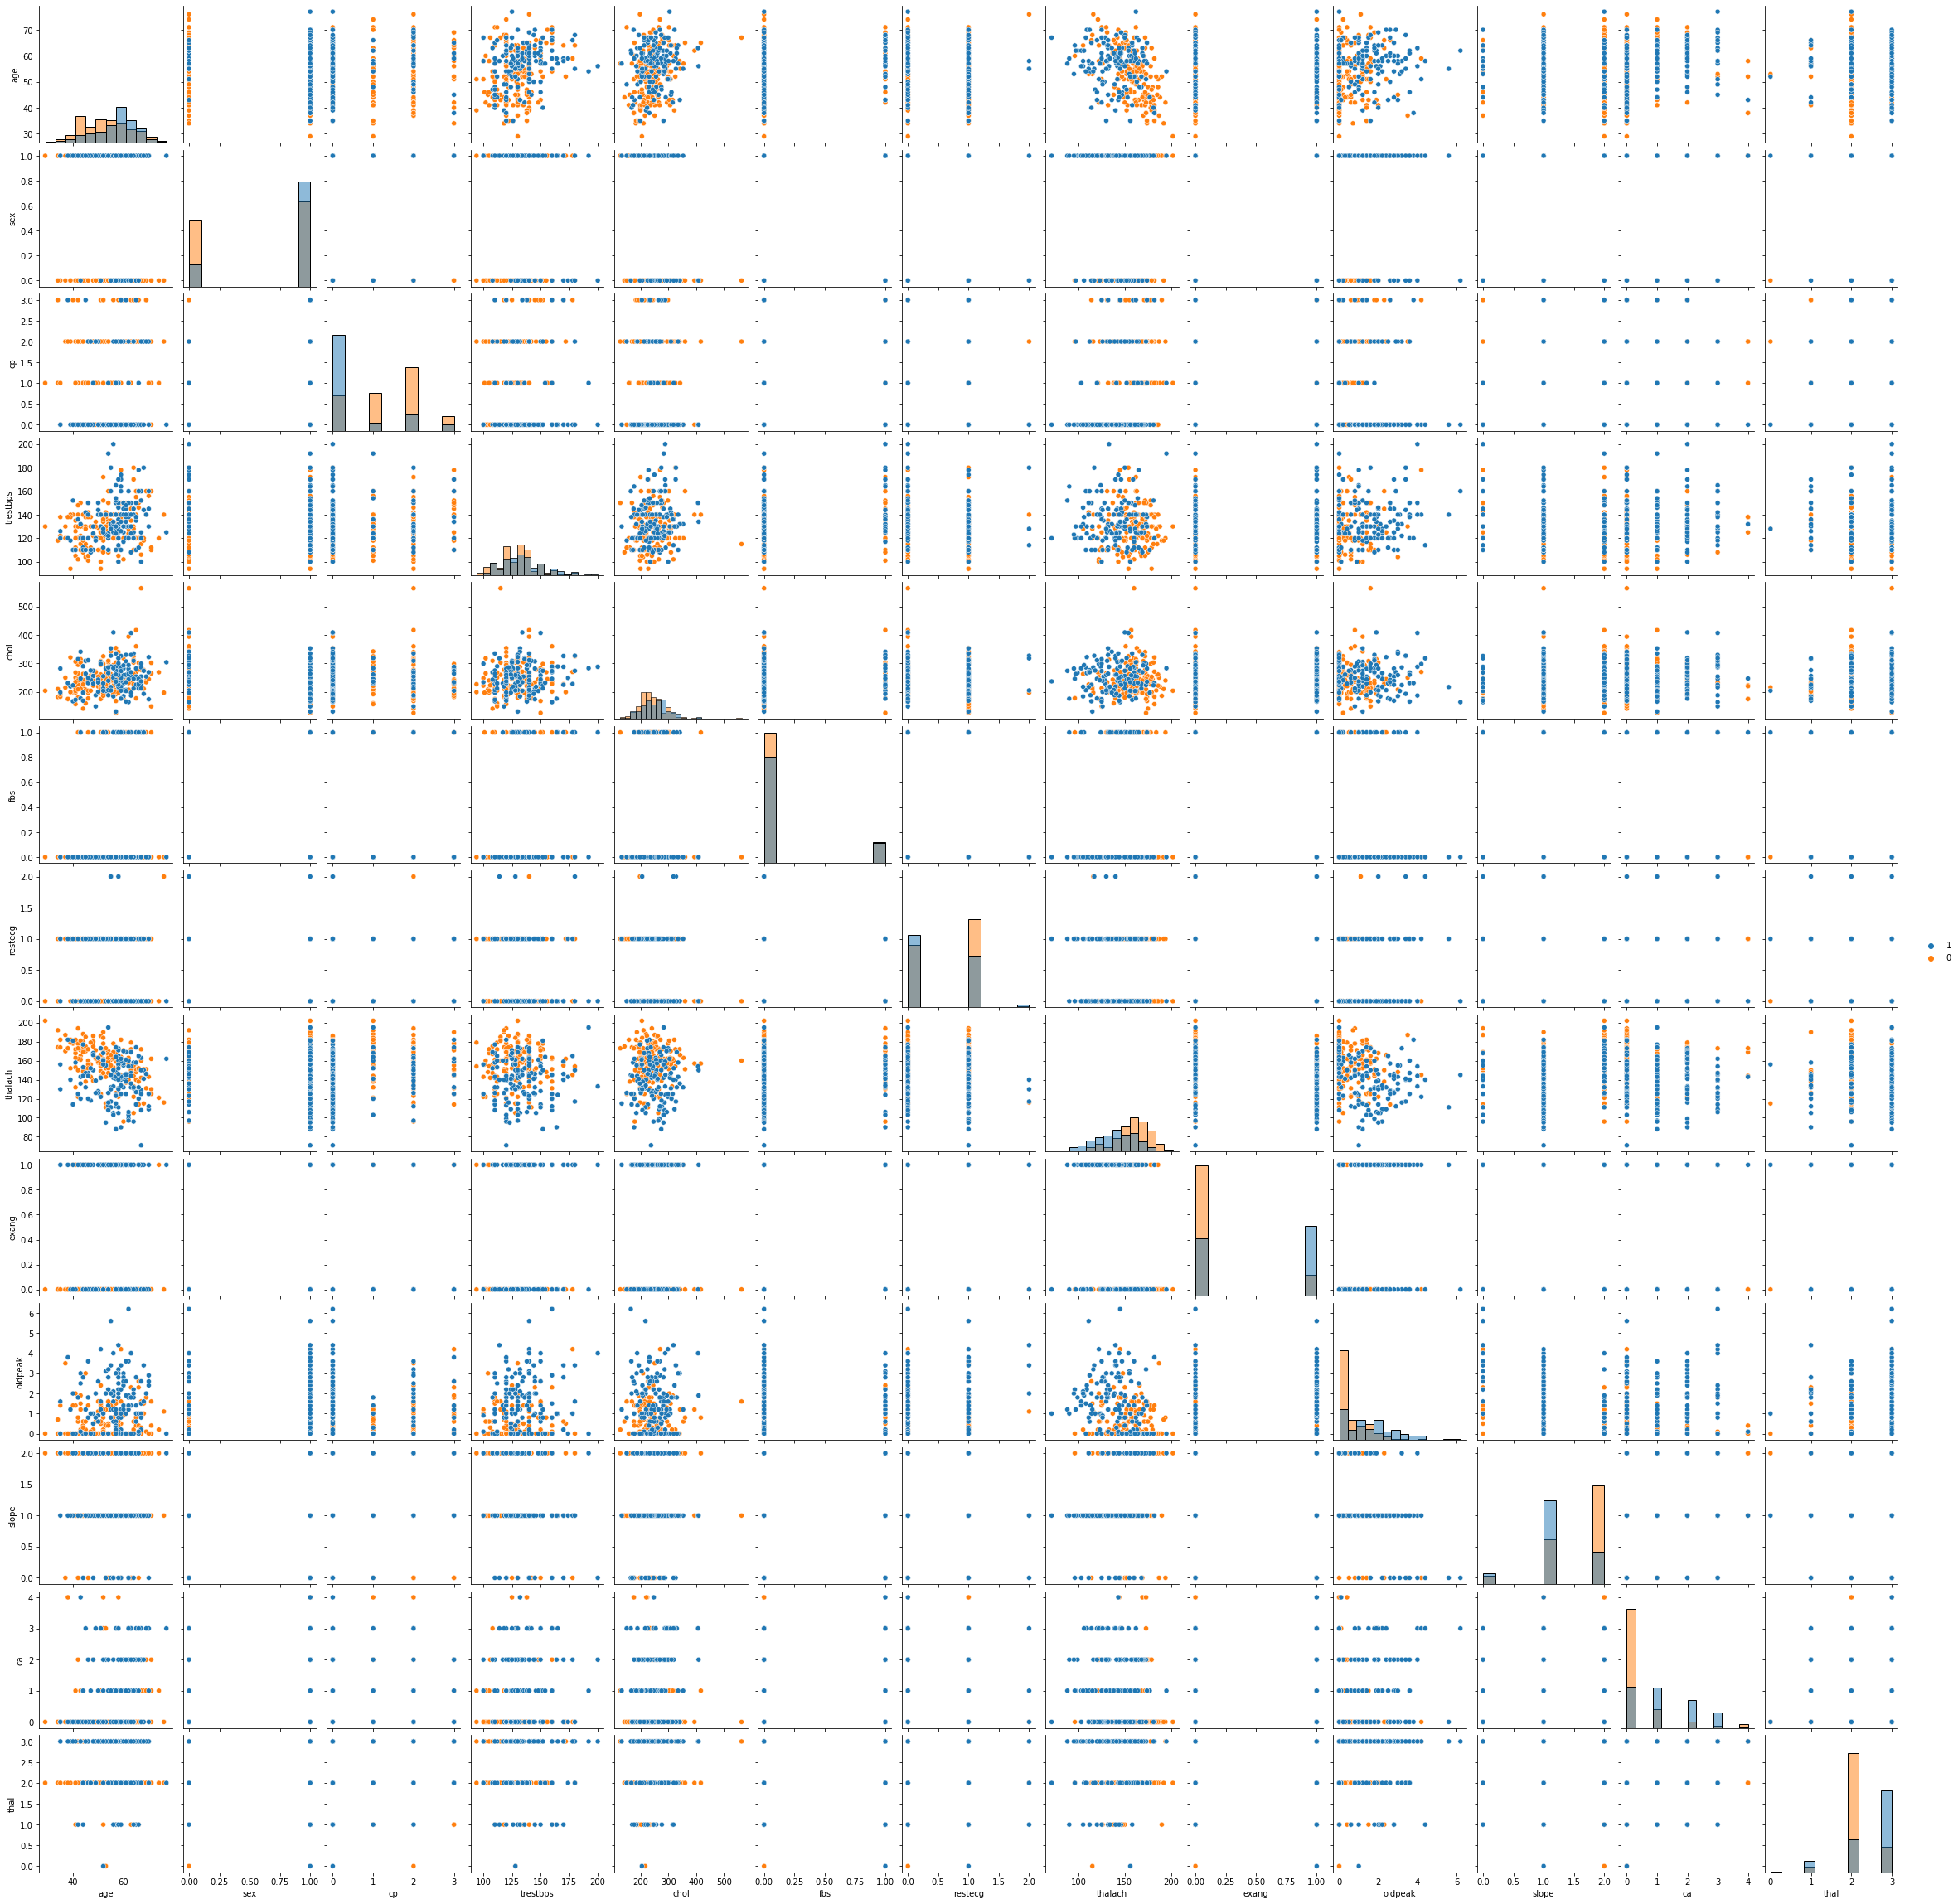

In [4]:
import seaborn as sns
#sns.set(style="ticks")


plot = sns.pairplot(df, hue="target", diag_kind="hist", diag_kws = dict(alpha=.5) );
plot._legend.set_title('')
new_labels = ['1', '0']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)
    
# Sorry for the size...

### XGboost

In this part you will build a classifier for the likelihood of having an heart attack using xgboost. You have to train, validate your classifier and print the most meaningful metrics.

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

##TODO split the sample into a training, a test set and a validation set
X = df.iloc[:, :-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

eval_set = [(X_val, y_val)]

##TODO train a classifier using early stopping and the logloss evaluation metric 

xgb_class = XGBClassifier()

xgb_class.fit(X_train, y_train,
             early_stopping_rounds = 10,
             eval_metric = "logloss", 
             eval_set = eval_set)



[0]	validation_0-logloss:0.57241
[1]	validation_0-logloss:0.51684
[2]	validation_0-logloss:0.47457
[3]	validation_0-logloss:0.42462
[4]	validation_0-logloss:0.39990
[5]	validation_0-logloss:0.37184
[6]	validation_0-logloss:0.35885
[7]	validation_0-logloss:0.36119
[8]	validation_0-logloss:0.36296
[9]	validation_0-logloss:0.37169
[10]	validation_0-logloss:0.37751
[11]	validation_0-logloss:0.38934
[12]	validation_0-logloss:0.39190
[13]	validation_0-logloss:0.38005
[14]	validation_0-logloss:0.38761
[15]	validation_0-logloss:0.39087


C:\Users\joppe\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\joppe\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.7608695652173914


C:\Users\joppe\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


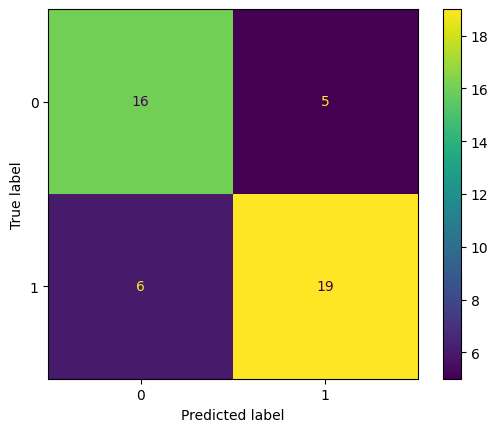

In [44]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

##TODO plot the confusion metrics and calculate the accuracy score
plot_confusion_matrix(xgb_class, X_test, y_test)
print(accuracy_score(y_test, xgb_class.predict(X_test)))

**What can you say about the performance of your classifier based on these metrics?**

In terms of accuracy, the model performs decently but not great (it classifies about 76% correctly).
When looking at the confusion matrix, we see that this corresponds to most predictions to be on the diagonal (we correctly predict a 1 label or correctly predict a 0 label). The model seems to make false negative and false positive mistakes at about the same rate. However, we only have a very small test sample, so we should not make too many conclusions about that. 

**Which metrics are better suited to evaluate this model? Calculate and visualize these metrics, and comment on the performance of the model.**

In general, all metrics mentioned below have some advantages and disadvantages. Given the context of medical diagnosis, it is probably very harmful to make a false negative mistake. We then predict that somebody does not have a disease, while they do have it. Therefore we want the error metric to reflect this (of course it is also harmful when we predict that somebody has a disease, while being healthy (a false positive). However, arguably this is less harmful). In that sense, it is important to look at the recall. The F1 score might also be worth looking into, but this is mainly if we value false positives and false negatives equally.

Moreover, we might want to consider the balance of the dataset. WIth 54% of the responses having target = 1, there seems to be an OK balance.

Lastly, the ROC and AUC scores are mainly applicable if we want to consider the calibration of the dataset and we are interested in the probabilities of the classes. Hence we do not pay too much attention to them here.

C:\Users\joppe\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\joppe\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\joppe\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\joppe\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

Recall_score:  0.76
F1 score:  0.7755102040816326
Precision score:  0.7916666666666666
auc                  0.873


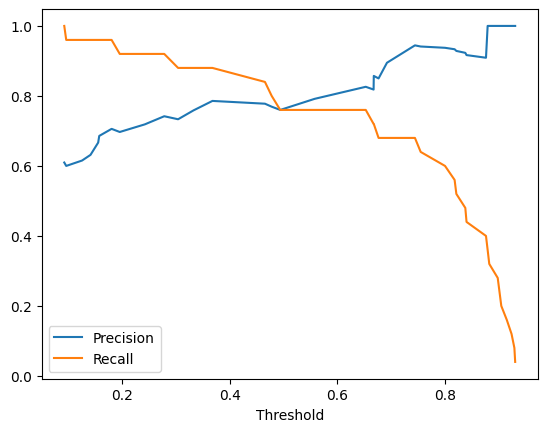

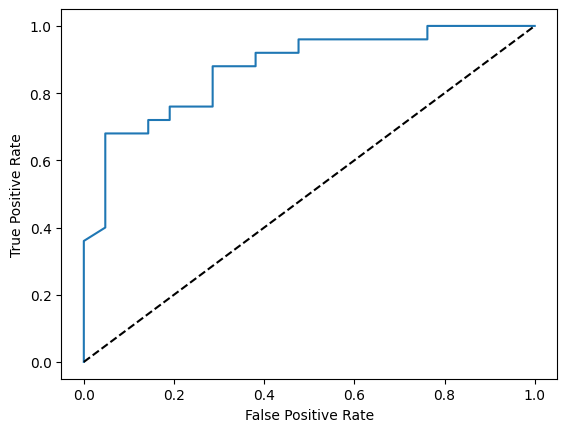

In [47]:
from sklearn.metrics import (precision_score, recall_score, f1_score, precision_recall_curve,
                             balanced_accuracy_score, roc_curve, auc, roc_auc_score)

print("Recall_score: ", recall_score(y_test, xgb_class.predict(X_test))) # We see a slightly lower score than based on accuracy
print("F1 score: ", f1_score(y_test, xgb_class.predict(X_test)))

print("Precision score: ", precision_score(y_test, xgb_class.predict(X_test))) # We already saw we have 0 false positives

# We see the classic tradeoff between recall and prediction. When increasing the threshold.
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_class.predict_proba(X_test)[:,1])
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

# From the AUC/ROC curve, we see that we definitely predict better than random guessing (above the diagonal)
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, xgb_class.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("{:20s} {:.3f}".format("auc", roc_auc_score(y_test, xgb_class.predict_proba(X_test)[:,1])))

**OPTIONAL QUESTION: Suppose that the classifier you built performs very well, would you suggest using it to decide on the allocation of treatments to preent heart attacks?**